# Credit EDA Case Study

#### Importing the libraries.

In [1]:
#import the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 125)

#'display.max_columns' is to display entries of all columns in the notebook

#### Read in the Data set


In [3]:
#Start by importing the 'application_data.csv'

df1 = pd.read_csv("application_data.csv")

In [4]:
#Print the head of the data frame.

df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Check the structure of the of the data (Normal Routine Check)

In [5]:
# Check the number of rows and columns in the dataframe

df1.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe, as the no.of columns are more, verbose will help to display info of all the columns.

df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

### Data Quality check and missing Values

#### Find the percentage of missing values for all the columns

In [7]:
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

SK_ID_CURR - 0.0%
TARGET - 0.0%
NAME_CONTRACT_TYPE - 0.0%
CODE_GENDER - 0.0%
FLAG_OWN_CAR - 0.0%
FLAG_OWN_REALTY - 0.0%
CNT_CHILDREN - 0.0%
AMT_INCOME_TOTAL - 0.0%
AMT_CREDIT - 0.0%
AMT_ANNUITY - 0.0%
AMT_GOODS_PRICE - 0.09%
NAME_TYPE_SUITE - 0.42%
NAME_INCOME_TYPE - 0.0%
NAME_EDUCATION_TYPE - 0.0%
NAME_FAMILY_STATUS - 0.0%
NAME_HOUSING_TYPE - 0.0%
REGION_POPULATION_RELATIVE - 0.0%
DAYS_BIRTH - 0.0%
DAYS_EMPLOYED - 0.0%
DAYS_REGISTRATION - 0.0%
DAYS_ID_PUBLISH - 0.0%
OWN_CAR_AGE - 65.99%
FLAG_MOBIL - 0.0%
FLAG_EMP_PHONE - 0.0%
FLAG_WORK_PHONE - 0.0%
FLAG_CONT_MOBILE - 0.0%
FLAG_PHONE - 0.0%
FLAG_EMAIL - 0.0%
OCCUPATION_TYPE - 31.35%
CNT_FAM_MEMBERS - 0.0%
REGION_RATING_CLIENT - 0.0%
REGION_RATING_CLIENT_W_CITY - 0.0%
WEEKDAY_APPR_PROCESS_START - 0.0%
HOUR_APPR_PROCESS_START - 0.0%
REG_REGION_NOT_LIVE_REGION - 0.0%
REG_REGION_NOT_WORK_REGION - 0.0%
LIVE_REGION_NOT_WORK_REGION - 0.0%
REG_CITY_NOT_LIVE_CITY - 0.0%
REG_CITY_NOT_WORK_CITY - 0.0%
LIVE_CITY_NOT_WORK_CITY - 0.0%
ORGANIZATION_T


#### Remove the columns with high missing percentage (>= 45%)

In [8]:
df1.dropna(thresh=df1.shape[0]*0.55,how='all',axis=1, inplace = True)

In [9]:
#check the shape of the dataset.
df1.shape

#earlier the no.of rows were 122, now the no.of rows become 73, after removing the columns with high missing percentage

(307511, 73)

#### For columns which has less percentage (around 13% or so), we need to check what will be the 
#### best metric to impute the missing values? Like if the column we are checking is a categorical 
#### column check, which category you can use to fill the nulls. For others check does mean or median
#### can be imputed or not. Others cases may be imputing with 0

In [10]:
#filling missing values in Occupation type as 'Others'

df1['OCCUPATION_TYPE'].fillna('Others',inplace=True)

#filling missing values in Name_type_suite with mode, as it is a categorical column
df1['NAME_TYPE_SUITE'].fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace=True)

#filling AMT_GOODS_PRICE with median, so that the column is not affected by any outliers.
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].median(),inplace=True)

#filling the missing values for the AMT_Req_Credit_Bureau with mode, as it is common process and time taken shall be same, unless the persons credit score is too bad
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df1['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)

df1['CNT_FAM_MEMBERS'].fillna(df1['CNT_FAM_MEMBERS'].mode()[0],inplace=True)
df1['CODE_GENDER'].replace('XNA',df1['CODE_GENDER'].mode()[0],inplace=True)

#### Check the datatypes of all the columns and change the datatype like negative age and date

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
df1['DAYS_BIRTH'].describe()

#Days are in _ve, so we have to change it into positive integers by using abs()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [13]:
df1['DAYS_BIRTH'] = abs(df1['DAYS_BIRTH'])

#Coverting days_birth into age by dividing the days with 365.

df1['AGE'] = round(df1['DAYS_BIRTH']/365)

In [14]:
#also, converting other days columns into positive integers by using abs()

df1['DAYS_EMPLOYED'] = abs(df1['DAYS_EMPLOYED'])
df1['DAYS_REGISTRATION'] = abs(df1['DAYS_REGISTRATION'])
df1['DAYS_ID_PUBLISH'] = abs(df1['DAYS_ID_PUBLISH'])

#### Checking outliers in the numerical columns

In [15]:
df1['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

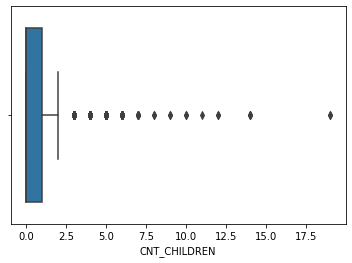

In [16]:
sns.boxplot(df1['CNT_CHILDREN'])
plt.show()

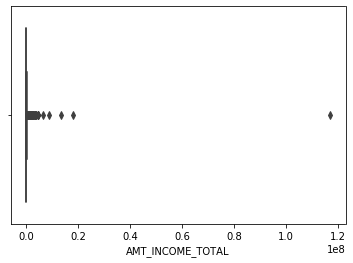

In [17]:
sns.boxplot(df1['AMT_INCOME_TOTAL'])
plt.show()

In [18]:
df1['AMT_INCOME_TOTAL'].quantile([0.25,0.5,0.75, 0.9, 0.99, 1])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

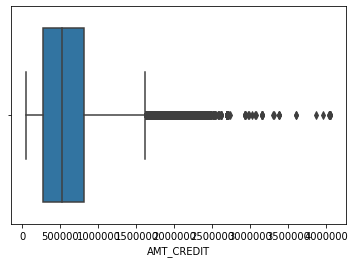

In [19]:
sns.boxplot(df1['AMT_CREDIT'])
plt.show()

In [20]:
df1['AMT_CREDIT'].quantile([0.25,0.5,0.75, 0.9, 0.99, 1])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

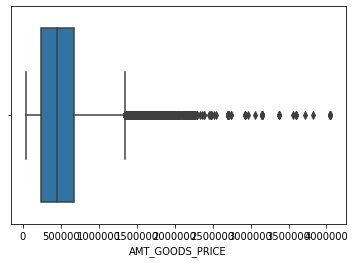

In [21]:
sns.boxplot(df1['AMT_GOODS_PRICE'])
plt.show()

In [22]:
df1['AMT_GOODS_PRICE'].quantile([0.25,0.5,0.75, 0.85, 0.999, 1])

#99.9% of the loan amount on goods price is up to 22.5 Lakhs, however remaining 0.01% we have considered as outliers, as the max loan amount
#taken in 40.5L

0.250     238500.0
0.500     450000.0
0.750     679500.0
0.850     900000.0
0.999    2250000.0
1.000    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

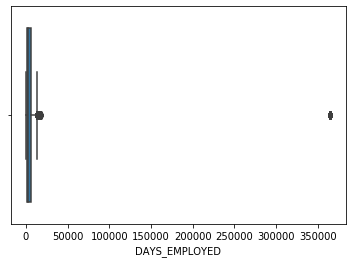

In [23]:
sns.boxplot(df1['DAYS_EMPLOYED'])
plt.show()

In [24]:
df1['DAYS_EMPLOYED'].quantile([0.25,0.5,0.75, 0.81, 0.99, 1])

0.25       933.0
0.50      2219.0
0.75      5707.0
0.81     10913.1
0.99    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [25]:
#for more thane 19% of the value, DAYS_EMPLOYED is of 365243 days which is > 1000years. So we have replaced the entries with 365243 days
#median of the DAYS_EMPLOYED column

df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].replace(365243,df1['DAYS_EMPLOYED'].median())
df1['DAYS_EMPLOYED'].describe()

count    307511.000000
mean       2354.427019
std        2118.332916
min           0.000000
25%         933.000000
50%        2219.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

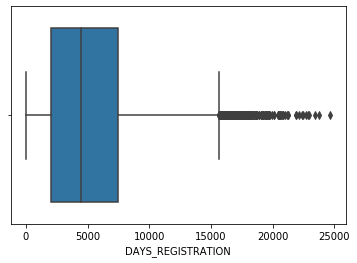

In [26]:
sns.boxplot(df1['DAYS_REGISTRATION'])
plt.show()

In [27]:
df1['DAYS_REGISTRATION'].quantile([0.25,0.5,0.75, 0.81, 0.99, 1])

0.25     2010.0
0.50     4504.0
0.75     7479.5
0.81     8382.0
0.99    13879.0
1.00    24672.0
Name: DAYS_REGISTRATION, dtype: float64

#### Binning of Continuous Variables

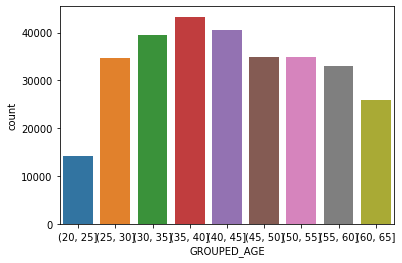

In [28]:
#binning of AGE

bins = np.arange(20,70,5)
df1['GROUPED_AGE'] = pd.cut(df1['AGE'],bins=bins)

sns.countplot(df1['GROUPED_AGE'])
plt.show()

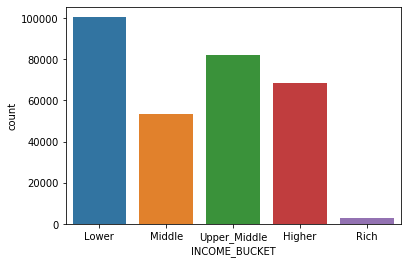

In [29]:
#binning of income

bins=df1['AMT_INCOME_TOTAL'].quantile([0,0.25,0.5,0.75, 0.99, 1])
df1['INCOME_BUCKET'] = pd.cut(df1.AMT_INCOME_TOTAL, bins = bins, labels = ["Lower", "Middle", "Upper_Middle", "Higher", "Rich"])

sns.countplot(df1['INCOME_BUCKET'])
plt.show()

In [30]:
df1[['AMT_INCOME_TOTAL', 'INCOME_BUCKET']]

,AMT_INCOME_TOTAL,INCOME_BUCKET
0,202500.0,Upper_Middle
1,270000.0,Higher
2,67500.0,Lower
3,135000.0,Middle
4,121500.0,Middle
...,...,...
307506,157500.0,Upper_Middle
307507,72000.0,Lower
307508,153000.0,Upper_Middle
307509,171000.0,Upper_Middle


# Analysis

In [31]:
#Checking of imbalance percentage

100*df1['TARGET'].value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Dividing the data into two Sets (df_1 for Default, df_0 for Non-Default)

In [32]:
df_1 = df1[df1['TARGET']==1]
df_0 = df1[df1['TARGET']==0]

In [33]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,GROUPED_AGE,INCOME_BUCKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,"(25.0, 30.0]",Upper_Middle
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51.0,"(50.0, 55.0]",Lower
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48.0,"(45.0, 50.0]",Upper_Middle
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37.0,"(35.0, 40.0]",Middle
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,2219,5391.0,4199,1,0,0,1,0,0,Others,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,NaN,Lower


In [34]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,GROUPED_AGE,INCOME_BUCKET
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,"(45, 50]",Higher
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,"(50, 55]",Lower
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,"(50, 55]",Middle
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,"(50, 55]",Middle
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,"(45, 50]",Lower


#### Univariate Analysis

In [35]:
df_1['NAME_INCOME_TYPE'].value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [36]:
df_0['NAME_INCOME_TYPE'].value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

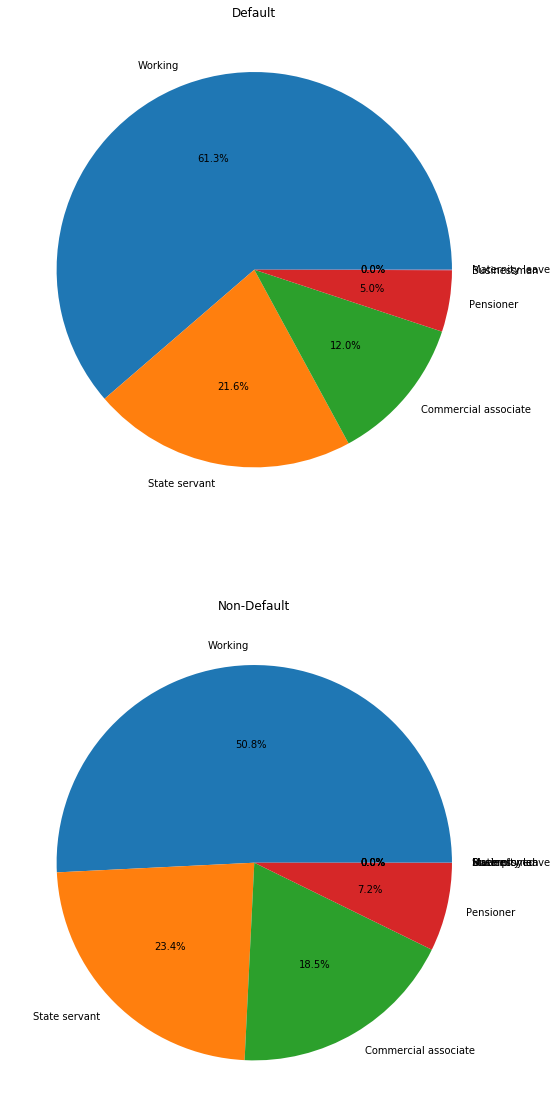

In [37]:
plt.figure(figsize = (15, 20))
plt.subplot(2,1,1)
plt.title('Default')
plt.pie(df_1['NAME_INCOME_TYPE'].value_counts(), labels = ['Working', 'State servant',  'Commercial associate', 'Pensioner', 'Businessman', 'Maternity leave'], autopct='%1.1f%%')


plt.subplot(2,1,2)
plt.title('Non-Default')
plt.pie(df_0['NAME_INCOME_TYPE'].value_counts(), labels = ['Working', 'State servant',  'Commercial associate', 'Pensioner', 'Businessman', 'Maternity leave',  'Student', 'Unemployed'], autopct='%1.1f%%')
plt.show()

#### Commercial associates are less likely to default & working class are more likely to Default

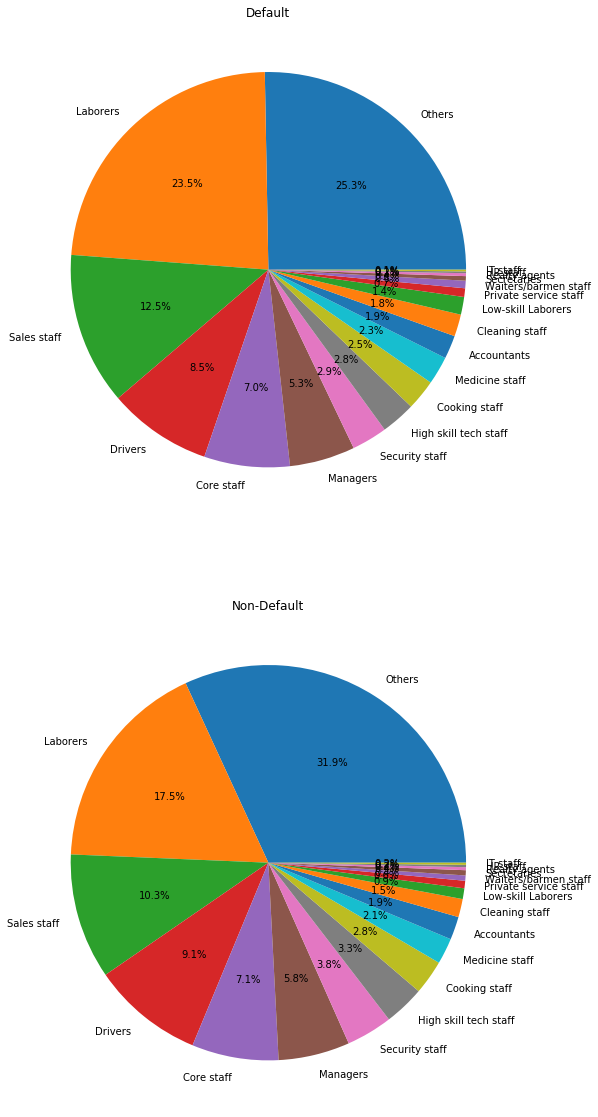

In [38]:
plt.figure(figsize = (15, 20))
plt.subplot(2,1,1)
plt.title('Default')
plt.pie(df_1['OCCUPATION_TYPE'].value_counts(), labels = df_1['OCCUPATION_TYPE'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,1,2)
plt.title('Non-Default')
plt.pie(df_0['OCCUPATION_TYPE'].value_counts(), labels = df_1['OCCUPATION_TYPE'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### Laborers are more likely to Default

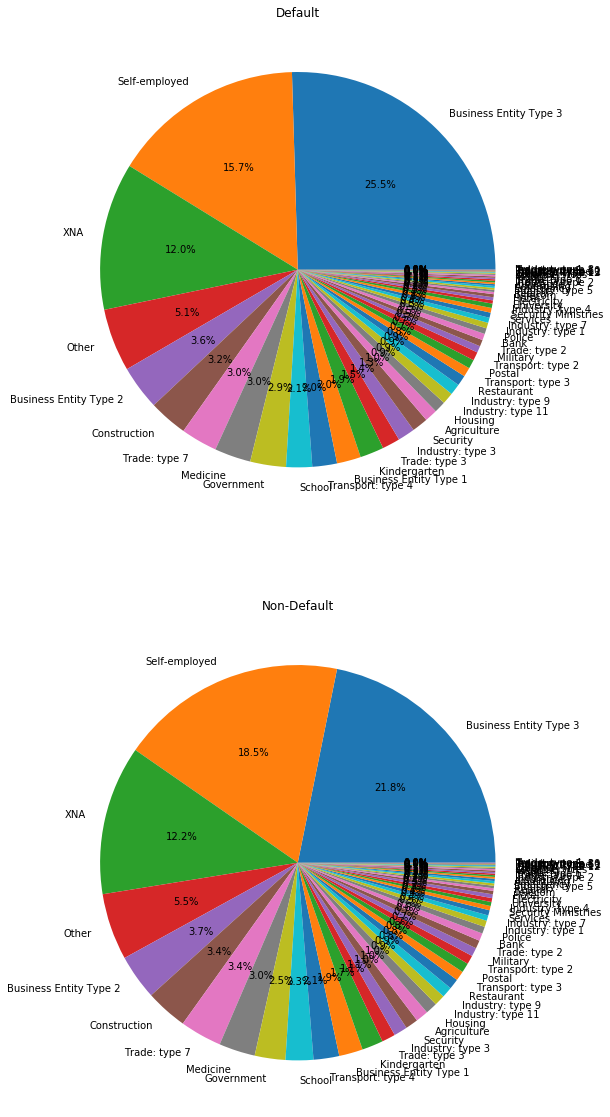

In [39]:
plt.figure(figsize = (15, 20))
plt.subplot(2,1,1)
plt.title('Default')
plt.pie(df_1['ORGANIZATION_TYPE'].value_counts(), labels = df_1['ORGANIZATION_TYPE'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,1,2)
plt.title('Non-Default')
plt.pie(df_0['ORGANIZATION_TYPE'].value_counts(), labels = df_1['ORGANIZATION_TYPE'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### Business Entity Type 3 people are more likely to default & Self Employed are less likely to default

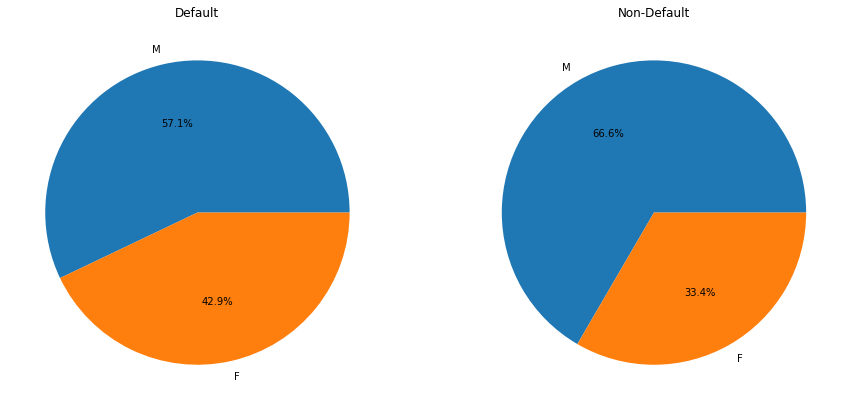

In [40]:
plt.figure(figsize = (15, 30))
plt.subplot(1,2,1)
plt.title('Default')
plt.pie(df_1['CODE_GENDER'].value_counts(), labels = ['M', 'F'], autopct='%1.1f%%')


plt.subplot(1,2,2)
plt.title('Non-Default')
plt.pie(df_0['CODE_GENDER'].value_counts(), labels = ['M', 'F'], autopct='%1.1f%%')
plt.show()

#### Female Gender are more likely to default, Male are more likely to non-default

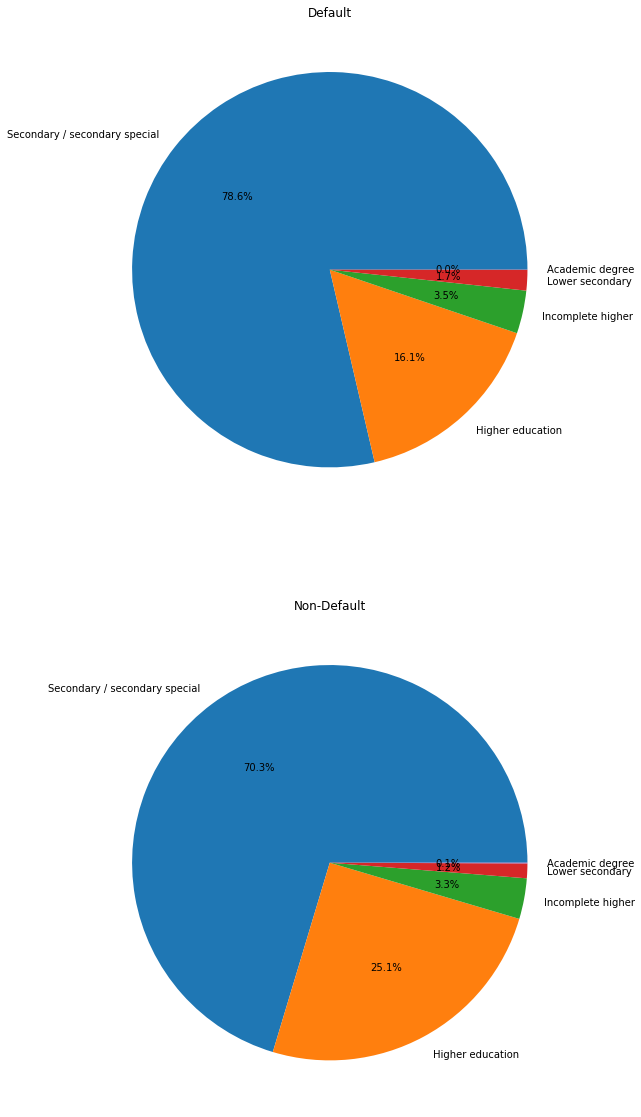

In [41]:
plt.figure(figsize = (15, 20))
plt.subplot(2,1,1)
plt.title('Default')
plt.pie(df_1['NAME_EDUCATION_TYPE'].value_counts(), labels = df_1['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,1,2)
plt.title('Non-Default')
plt.pie(df_0['NAME_EDUCATION_TYPE'].value_counts(), labels = df_1['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### Higher education applicants are more likely to be Non-Defaulters

## Continuous Univariate Analysis

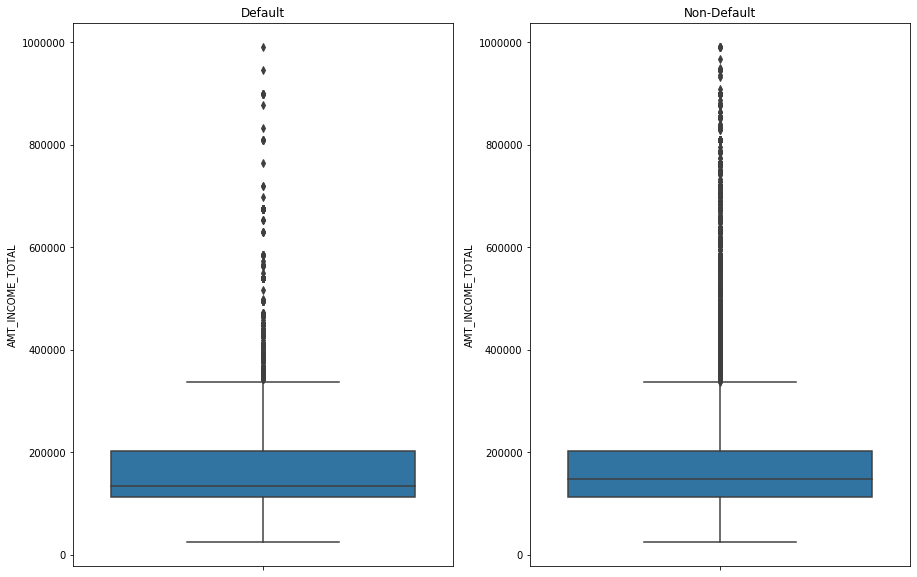

In [42]:
plt.figure(figsize = (15, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(df_1[df_1['AMT_INCOME_TOTAL']<=1000000]['AMT_INCOME_TOTAL'], orient = 'v')


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(df_0[df_0['AMT_INCOME_TOTAL']<=1000000]['AMT_INCOME_TOTAL'], orient = 'v')

#### People above income of 4 Lakhs are less likely to Default, as the outliers are continuous,
#### 50% quantile is slightly above for Non-Defaulters when compared with Defaulters

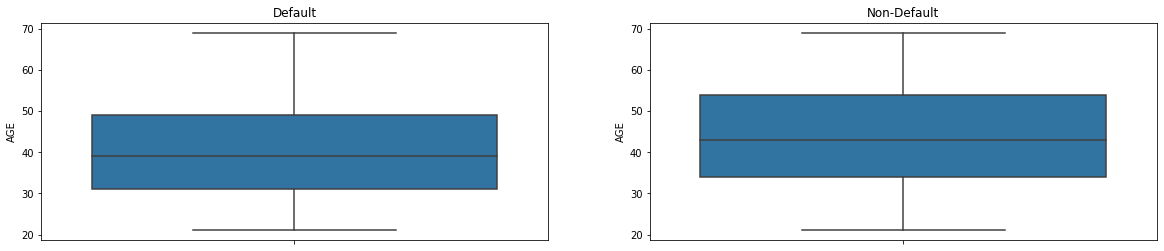

In [43]:
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(df_1['AGE'], orient = 'v')


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(df_0['AGE'], orient = 'v')

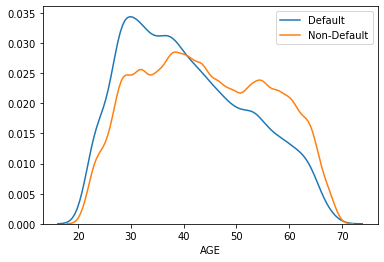

In [44]:
sns.distplot(df_1['AGE'], hist = False, label = 'Default')
sns.distplot(df_0['AGE'], hist = False, label = 'Non-Default')

#### Quantile values are above for Non-Defaulters, People are likely to Non-default as the age increases

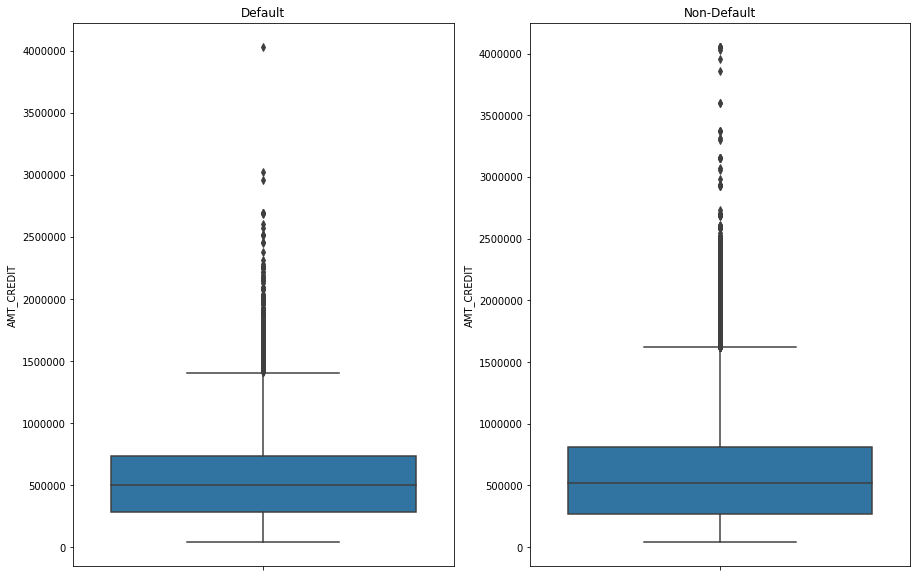

In [45]:
plt.figure(figsize = (15, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(df_1['AMT_CREDIT'], orient = 'v')


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(df_0['AMT_CREDIT'], orient = 'v')

#### Credit value above 15 Lakhs are less likely to Default

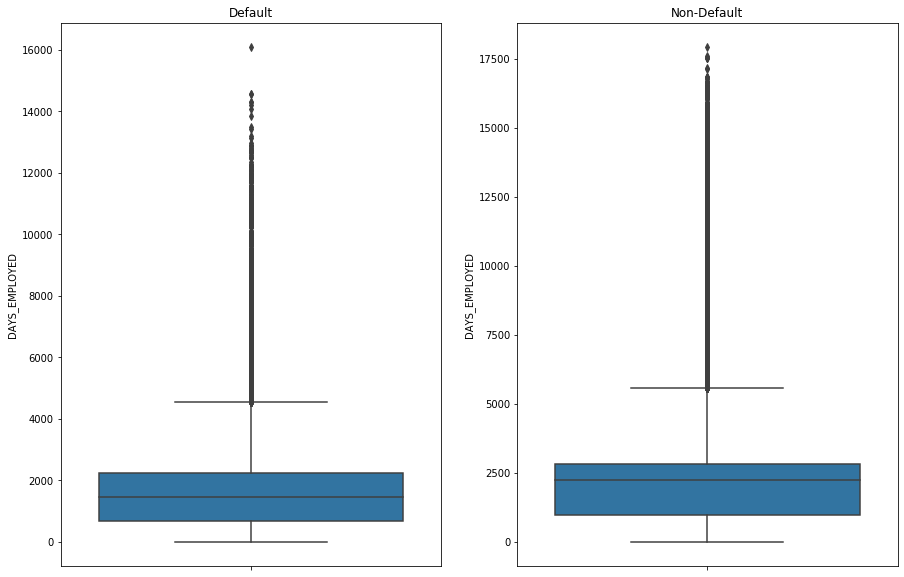

In [46]:
plt.figure(figsize = (15, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(df_1['DAYS_EMPLOYED'],orient = 'v')


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(df_0['DAYS_EMPLOYED'], orient = 'v')

#### Median of Non-Defaulters is 2500 days when compared to <2000 days of defaulters

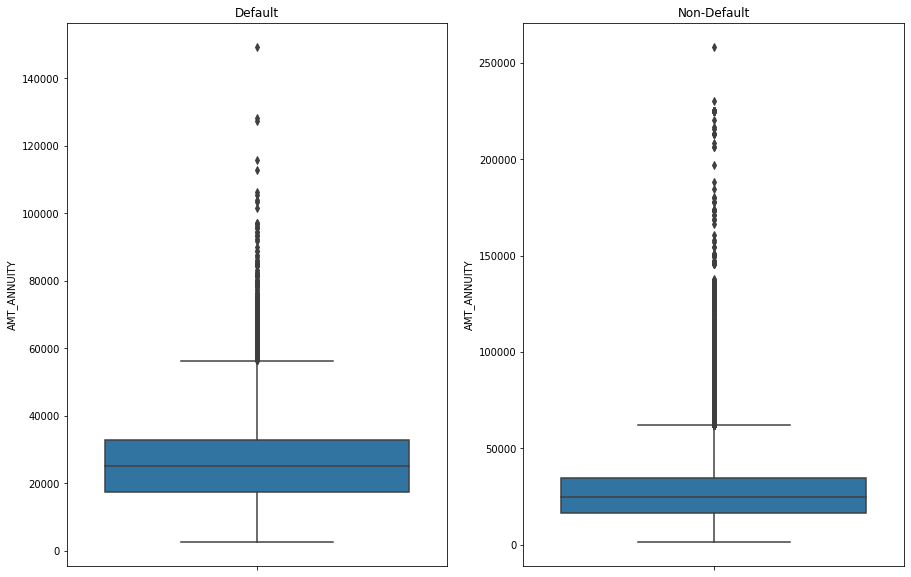

In [47]:
plt.figure(figsize = (15, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(df_1['AMT_ANNUITY'], orient = 'v')


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(df_0['AMT_ANNUITY'], orient = 'v')

#### People with Amt_Annuity more than 1 Lakh are less likely to Default

## Finding Correlation for numerical variables for both the cases 0 and 1

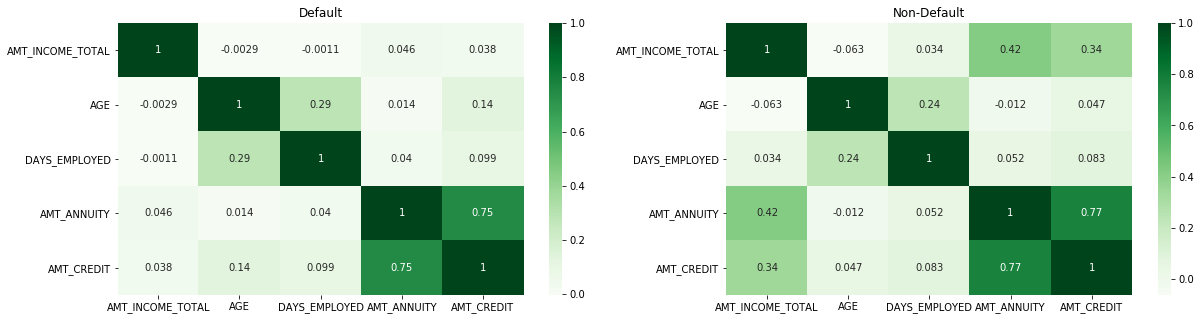

In [48]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title('Default')
sns.heatmap(df_1[['AMT_INCOME_TOTAL','AGE','DAYS_EMPLOYED','AMT_ANNUITY','AMT_CREDIT']].corr(), cmap = 'Greens', annot = True)
plt.subplot(1,2,2)
plt.title('Non-Default')
sns.heatmap(df_0[['AMT_INCOME_TOTAL','AGE','DAYS_EMPLOYED','AMT_ANNUITY','AMT_CREDIT']].corr(), cmap = 'Greens', annot = True)

####  AMT_ANNUITY & AMT_CREDIT are highly co-related for Defaulters & Non-Defaulters

#### Non-default has higher co-relation between AMT_INCOME_TOTAL VS AMT_ANNUITY & AMT_INCOME_TOTAL VS AMT_CREDIT vis-a-vis Defaulters

## Bi-variate Analysis

### Categorical- Categorical Bi-Variate Analysis

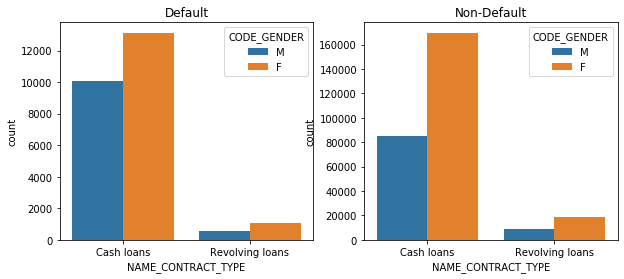

In [49]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', hue_order = ['M', 'F'], data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', hue_order = ['M', 'F'],data = df_0)

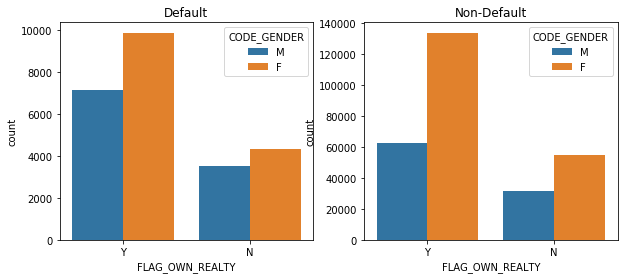

In [50]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'CODE_GENDER',hue_order = ['M', 'F'], order = ['Y', 'N'],data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'CODE_GENDER', hue_order = ['M', 'F'], order = ['Y', 'N'],data = df_0)

In [51]:
df_0['FLAG_OWN_REALTY'] = df_0['FLAG_OWN_REALTY'].apply(lambda x: 1 if x=='Y' else 0)
df_1['FLAG_OWN_REALTY'] = df_1['FLAG_OWN_REALTY'].apply(lambda x: 1 if x=='Y' else 0)


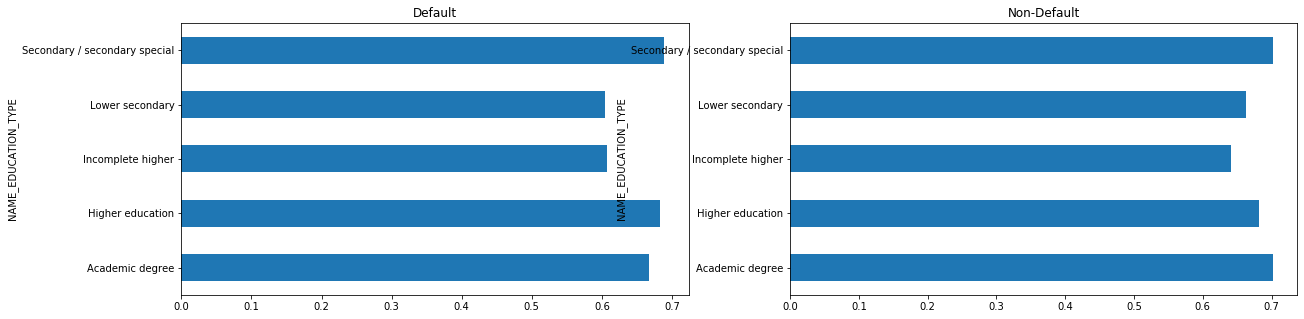

In [52]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title("Default")
df_1.groupby('NAME_EDUCATION_TYPE')['FLAG_OWN_REALTY'].mean().plot.barh()

plt.subplot(1,2,2)
plt.title("Non-Default")
df_0.groupby('NAME_EDUCATION_TYPE')['FLAG_OWN_REALTY'].mean().plot.barh()

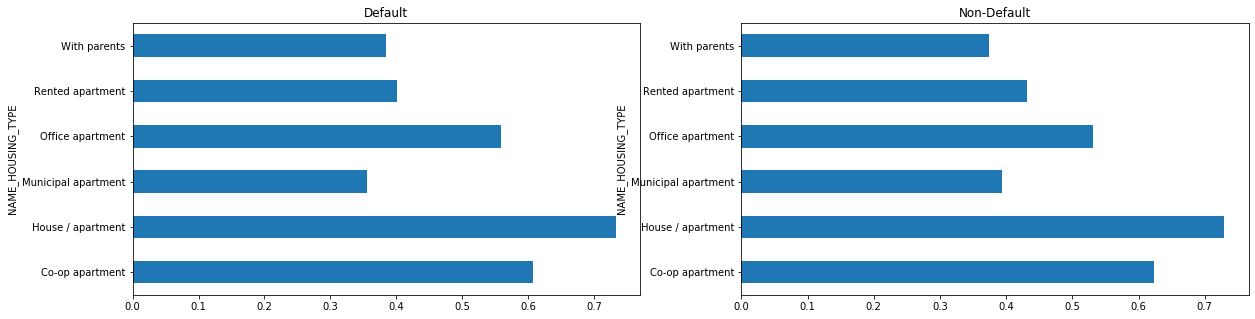

In [53]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title("Default")
df_1.groupby('NAME_HOUSING_TYPE')['FLAG_OWN_REALTY'].mean().plot.barh()

plt.subplot(1,2,2)
plt.title("Non-Default")
df_0.groupby('NAME_HOUSING_TYPE')['FLAG_OWN_REALTY'].mean().plot.barh()

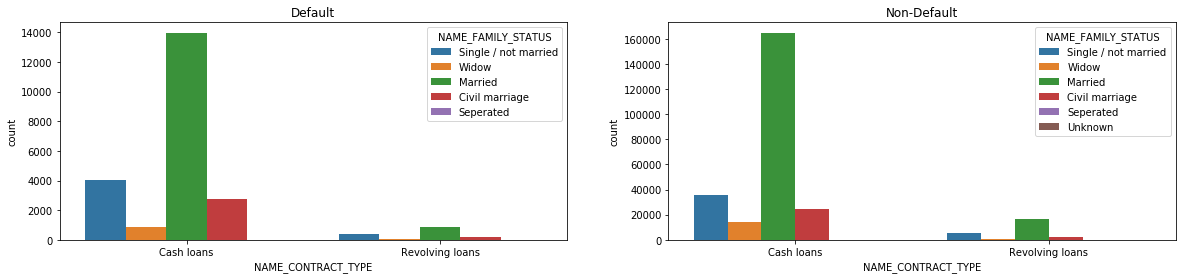

In [54]:
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'NAME_FAMILY_STATUS', hue_order = ['Single / not married', 'Widow','Married','Civil marriage', 'Seperated'],data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'NAME_FAMILY_STATUS',hue_order = ['Single / not married', 'Widow','Married','Civil marriage', 'Seperated', 'Unknown'],data = df_0)

In [55]:
df_0['FLAG_OWN_CAR'] = df_0['FLAG_OWN_CAR'].apply(lambda x: 1 if x=='Y' else 0)
df_1['FLAG_OWN_CAR'] = df_1['FLAG_OWN_CAR'].apply(lambda x: 1 if x=='Y' else 0)


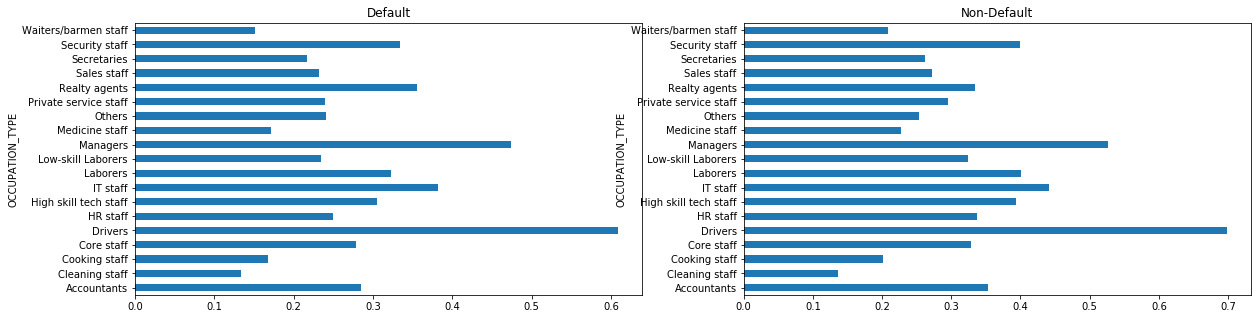

In [56]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title("Default")
df_1.groupby('OCCUPATION_TYPE')['FLAG_OWN_CAR'].mean().plot.barh()

plt.subplot(1,2,2)
plt.title("Non-Default")
df_0.groupby('OCCUPATION_TYPE')['FLAG_OWN_CAR'].mean().plot.barh()

### Categorical - Continuous Bi-Variate Analysis

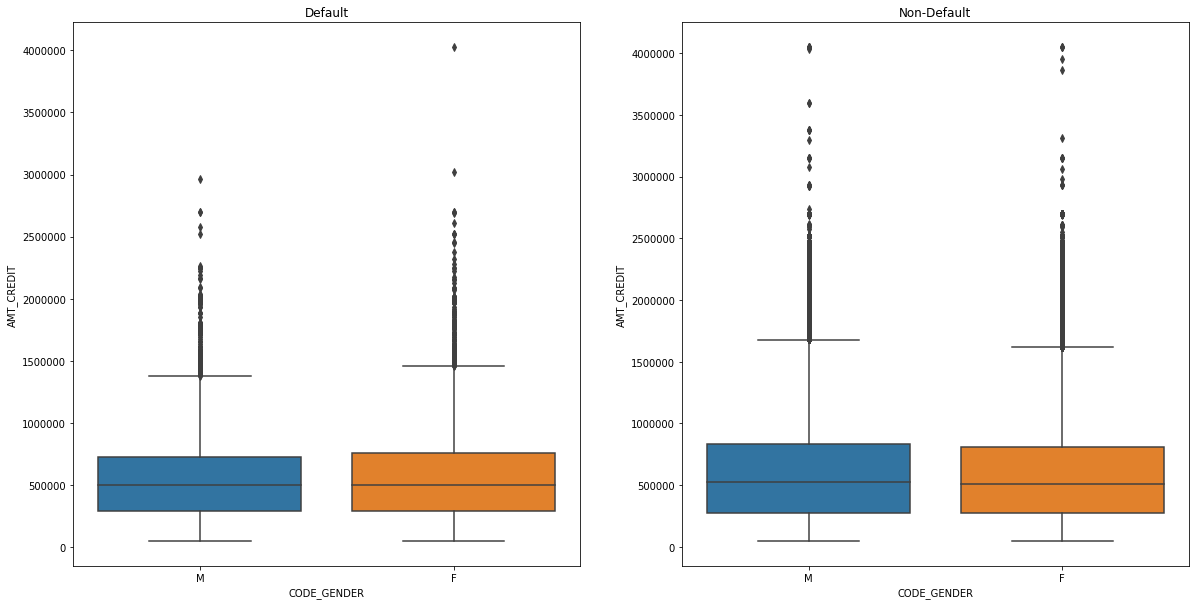

In [57]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "CODE_GENDER", y = 'AMT_CREDIT', order = ['M', 'F'], data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(x = "CODE_GENDER", y = 'AMT_CREDIT', order = ['M','F'],data = df_0)

#### Male applicants with Amt_credit above 75% quantile are less likely to be defaulters

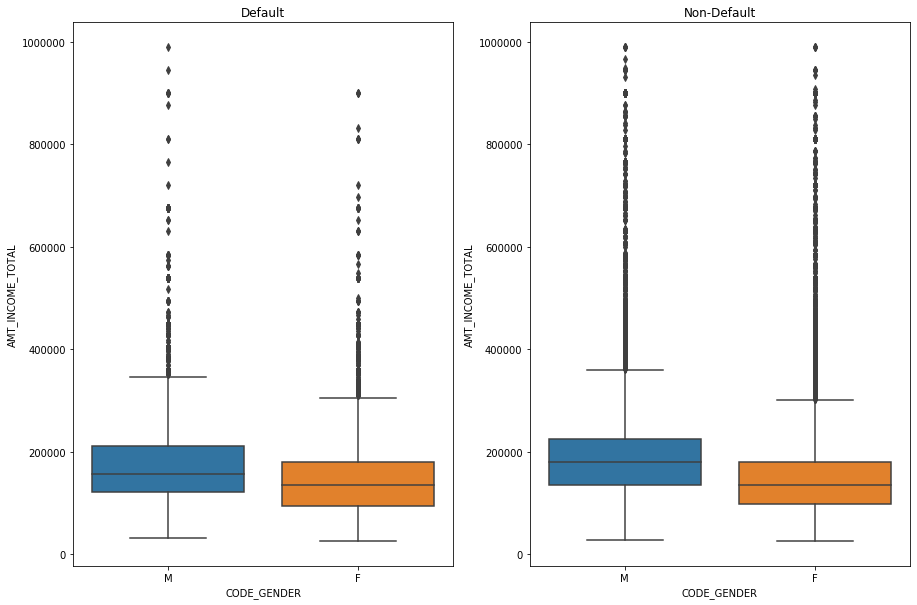

In [58]:
plt.figure(figsize = (15, 10))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "CODE_GENDER", y = df_1[df_1['AMT_INCOME_TOTAL']<=1000000]['AMT_INCOME_TOTAL'], order = ['M', 'F'],data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(x = "CODE_GENDER", y = df_0[df_0['AMT_INCOME_TOTAL']<=1000000]['AMT_INCOME_TOTAL'], order = ['M', 'F'],data = df_0)

#### For Male applicants with Amt_Income_Total, 50% quantile is more for Non-Defaulters
#### Where as for Female applicants with Amt_Income_Total, 50% quantile is less when compared with Defaulters

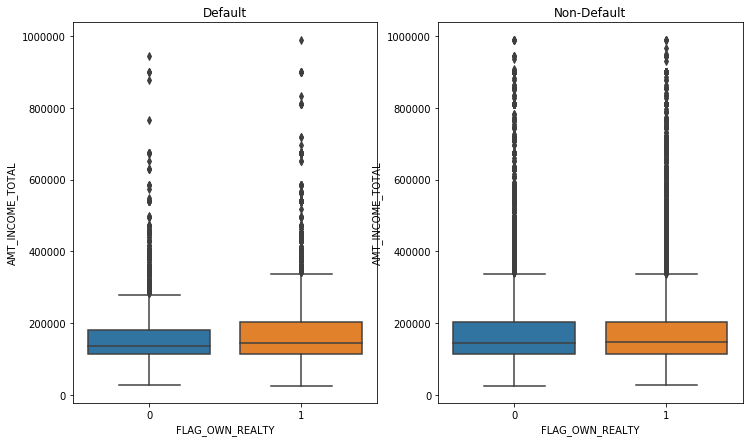

In [59]:
plt.figure(figsize = (12, 7))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "FLAG_OWN_REALTY", y = df_1[df_1['AMT_INCOME_TOTAL']<=1000000]['AMT_INCOME_TOTAL'], data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(x = "FLAG_OWN_REALTY", y = df_0[df_0['AMT_INCOME_TOTAL']<=1000000]['AMT_INCOME_TOTAL'], data = df_0)

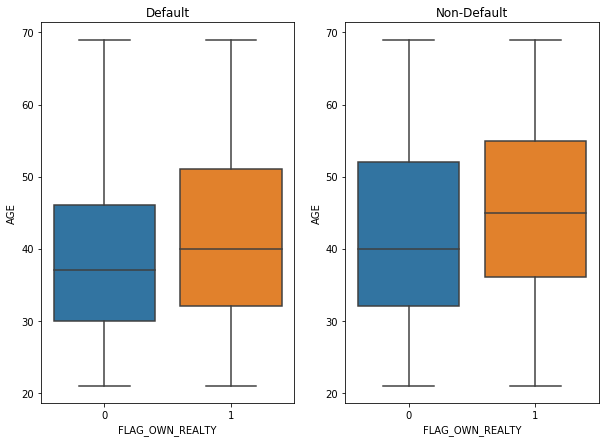

In [60]:
plt.figure(figsize = (10, 7))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "FLAG_OWN_REALTY", y = 'AGE', data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(x = "FLAG_OWN_REALTY", y = 'AGE', data = df_0)

#### Applicants who are older and do not own a property are less likely to be Defaulters

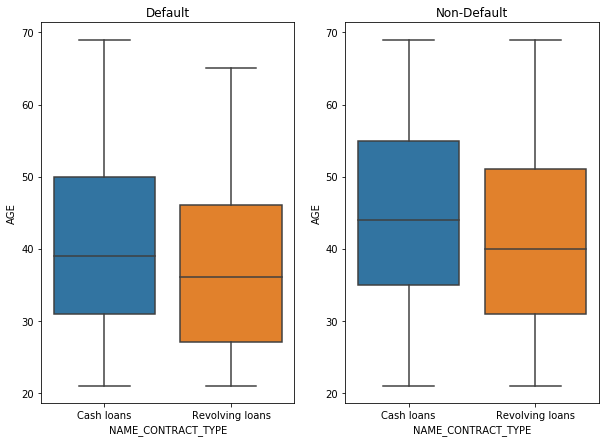

In [61]:
plt.figure(figsize = (10, 7))
plt.subplot(1,2,1)
plt.title("Default")
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = 'AGE', data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Default")
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = 'AGE', data = df_0)

### Continuous - Continuous Bi-Variate Analysis

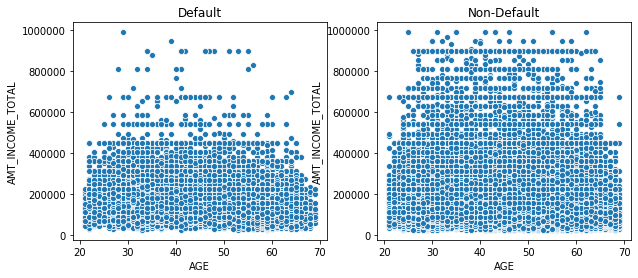

In [62]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(data=df_1[df_1['AMT_INCOME_TOTAL']<1000000],x='AGE',y='AMT_INCOME_TOTAL')

plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(data=df_0[df_0['AMT_INCOME_TOTAL']<1000000],x='AGE',y='AMT_INCOME_TOTAL')

#### Across all ages, people having income above 4 Lakhs are less likely to be Defaulters

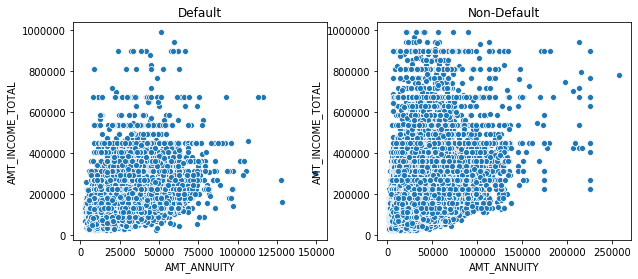

In [63]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(data=df_1[df_1['AMT_INCOME_TOTAL']<1000000],x='AMT_ANNUITY',y='AMT_INCOME_TOTAL')

plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(data=df_0[df_0['AMT_INCOME_TOTAL']<1000000],x='AMT_ANNUITY',y='AMT_INCOME_TOTAL')

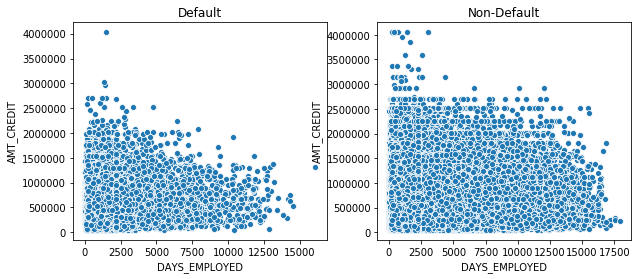

In [64]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(data=df_1,x='DAYS_EMPLOYED',y='AMT_CREDIT')

plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(data=df_0,x='DAYS_EMPLOYED',y='AMT_CREDIT')

#### Applicants working for more years and with less credit amount are less likely to be Defaulters

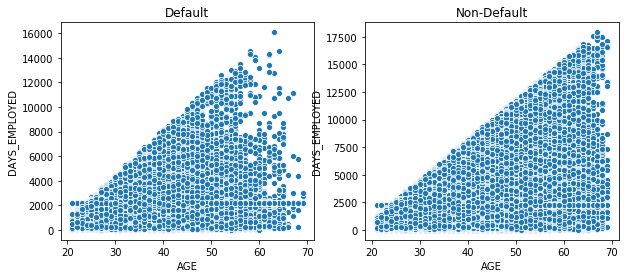

In [65]:
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(data=df_1,x='AGE',y='DAYS_EMPLOYED')

plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(data=df_0,x='AGE',y='DAYS_EMPLOYED')

#### Applicants with more Days_Employed and high age are less likely to be Defaulters

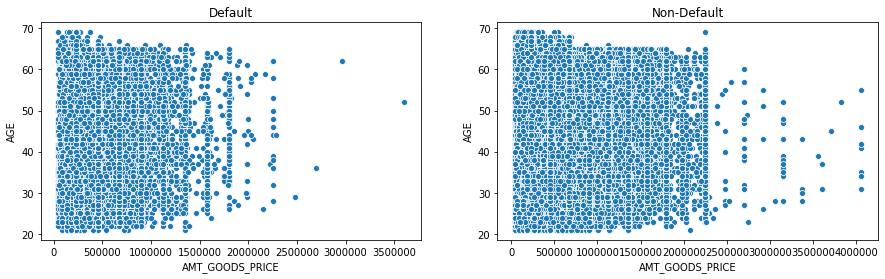

In [66]:
plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("Default")
sns.scatterplot(data=df_1,x='AMT_GOODS_PRICE',y='AGE')

plt.subplot(1,2,2)
plt.title("Non-Default")
sns.scatterplot(data=df_0,x='AMT_GOODS_PRICE',y='AGE')

#### Across all ages, Amt_Goods_Price above 15 Lakhs are less likely to be Defaulters

# Read "Previous Application" data

In [67]:
df2 = pd.read_csv("previous_application.csv")

#### Merging of both Application data and Previous application data

In [68]:
df12 = pd.merge(left=df1,right=df2, how='left', on='SK_ID_CURR')

In [70]:
df12.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,GROUPED_AGE,INCOME_BUCKET,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,"(25, 30]",Upper_Middle,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,"(45, 50]",Higher,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,"(45, 50]",Higher,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0

In [72]:
df12.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 112 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE_x             object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  D

In [73]:
# to caluculate %age of missing rows in combined data set

for colm in df12.columns:
    pct_missing = np.mean(df12[colm].isnull())
    print('{} - {}%'.format(colm, round(pct_missing*100,2)))

SK_ID_CURR - 0.0%
TARGET - 0.0%
NAME_CONTRACT_TYPE_x - 0.0%
CODE_GENDER - 0.0%
FLAG_OWN_CAR - 0.0%
FLAG_OWN_REALTY - 0.0%
CNT_CHILDREN - 0.0%
AMT_INCOME_TOTAL - 0.0%
AMT_CREDIT_x - 0.0%
AMT_ANNUITY_x - 0.01%
AMT_GOODS_PRICE_x - 0.0%
NAME_TYPE_SUITE_x - 0.0%
NAME_INCOME_TYPE - 0.0%
NAME_EDUCATION_TYPE - 0.0%
NAME_FAMILY_STATUS - 0.0%
NAME_HOUSING_TYPE - 0.0%
REGION_POPULATION_RELATIVE - 0.0%
DAYS_BIRTH - 0.0%
DAYS_EMPLOYED - 0.0%
DAYS_REGISTRATION - 0.0%
DAYS_ID_PUBLISH - 0.0%
FLAG_MOBIL - 0.0%
FLAG_EMP_PHONE - 0.0%
FLAG_WORK_PHONE - 0.0%
FLAG_CONT_MOBILE - 0.0%
FLAG_PHONE - 0.0%
FLAG_EMAIL - 0.0%
OCCUPATION_TYPE - 0.0%
CNT_FAM_MEMBERS - 0.0%
REGION_RATING_CLIENT - 0.0%
REGION_RATING_CLIENT_W_CITY - 0.0%
WEEKDAY_APPR_PROCESS_START_x - 0.0%
HOUR_APPR_PROCESS_START_x - 0.0%
REG_REGION_NOT_LIVE_REGION - 0.0%
REG_REGION_NOT_WORK_REGION - 0.0%
LIVE_REGION_NOT_WORK_REGION - 0.0%
REG_CITY_NOT_LIVE_CITY - 0.0%
REG_CITY_NOT_WORK_CITY - 0.0%
LIVE_CITY_NOT_WORK_CITY - 0.0%
ORGANIZATION_TYPE - 0.0%

In [74]:
df12.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               577560
DAYS_LAST_DUE_1ST_VERSION    577560
DAYS_LAST_DUE                577560
DAYS_TERMINATION             577560
NFLAG_INSURED_ON_APPROVAL    577560
Length: 112, dtype: int64

In [75]:
df12['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [76]:
#Dropping of columns with missing values greater than 45%

df12.dropna(thresh=df12.shape[0]*0.55,how='all',axis=1, inplace = True)

In [77]:
df12.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               577560
DAYS_LAST_DUE_1ST_VERSION    577560
DAYS_LAST_DUE                577560
DAYS_TERMINATION             577560
NFLAG_INSURED_ON_APPROVAL    577560
Length: 107, dtype: int64

In [79]:
# Shape of the combined data set after dropiing columns with more than 45% missing values
df12.shape

(1430155, 107)

In [92]:
df12['NAME_CLIENT_TYPE'].replace('XNA',df12['NAME_CLIENT_TYPE'].mode()[0],inplace=True)

### Analysis of Name_Contract_Status with other columns

## Univariate Analysis

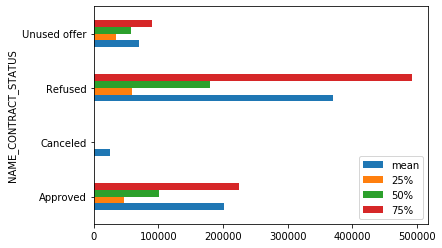

In [93]:
df12.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y'].describe()[['mean','25%','50%','75%']].plot.barh()

#### Chances of Application being Refused is more if the Credit Amount is more than 2 Lakhs

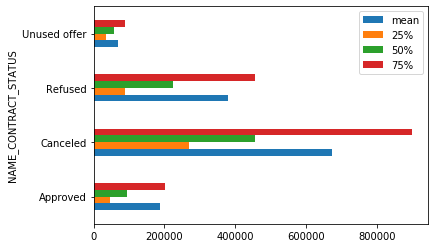

In [94]:
df12.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE_y'].describe()[['mean','25%','50%','75%']].plot.barh()

#### Chances of Application being Refused or getting cancelled is more if the Amount Goods price is more than 2 Lakhs

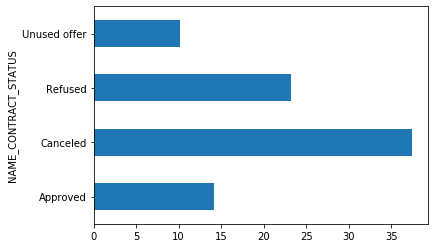

In [95]:
df12.groupby('NAME_CONTRACT_STATUS')['CNT_PAYMENT'].mean().plot.barh()

#### Chances of Application getting Refused or Cancelled is more if the payment tenure is more than 15 Months

In [ ]:
df_A = df12[df12['NAME_CONTRACT_STATUS']=='Approved']
df_C = df12[df12['NAME_CONTRACT_STATUS']=='Canceled']
df_R = df12[df12['NAME_CONTRACT_STATUS']=='Refused']
df_U = df12[df12['NAME_CONTRACT_STATUS']=='Unused offer']

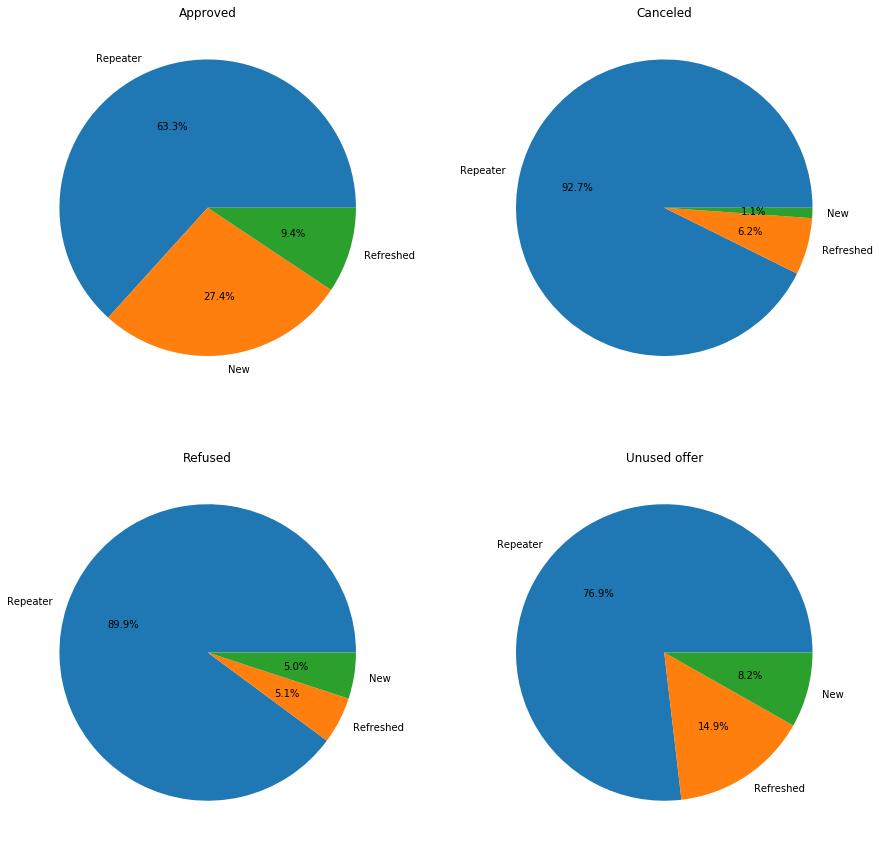

In [105]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plt.title('Approved')
plt.pie(df_A['NAME_CLIENT_TYPE'].value_counts(), labels = df_A['NAME_CLIENT_TYPE'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,2,2)
plt.title('Canceled')
plt.pie(df_C['NAME_CLIENT_TYPE'].value_counts(), labels = df_C['NAME_CLIENT_TYPE'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,2,3)
plt.title('Refused')
plt.pie(df_R['NAME_CLIENT_TYPE'].value_counts(), labels = df_R['NAME_CLIENT_TYPE'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,2,4)
plt.title('Unused offer')
plt.pie(df_U['NAME_CLIENT_TYPE'].value_counts(), labels = df_U['NAME_CLIENT_TYPE'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### Chances of an Application getting Approved is more for a New Applicant
#### Chances of an applicant Unuse the offer is more for a Refreshed Applicant
#### Chances of an Application getting Cancelled or Refused is very high for a Repeater

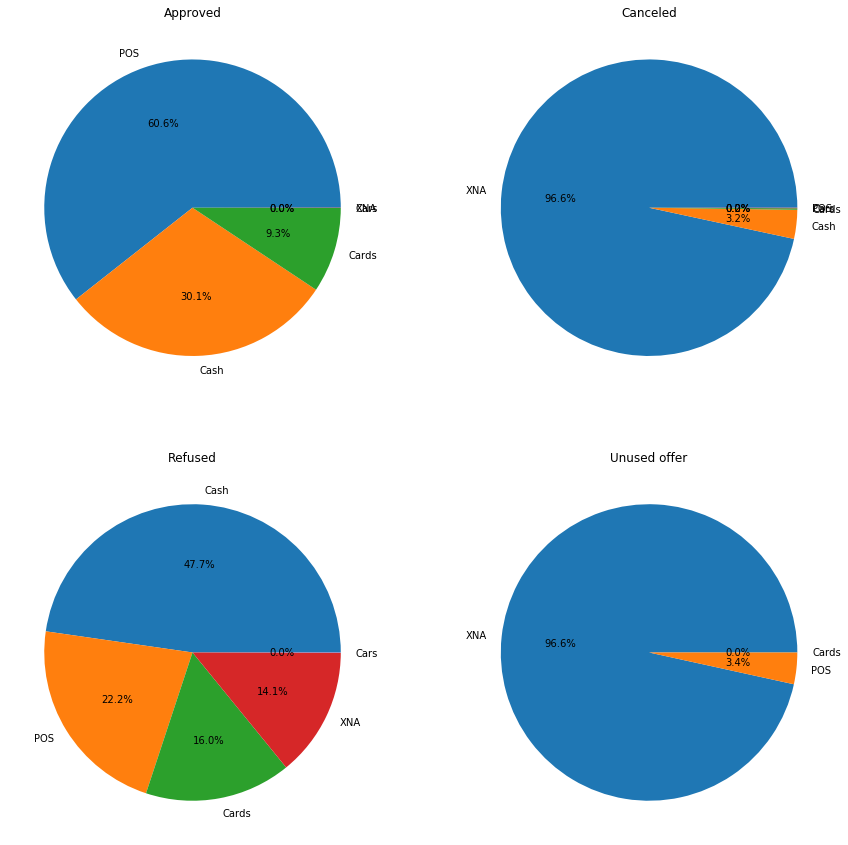

In [110]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plt.title('Approved')
plt.pie(df_A['NAME_PORTFOLIO'].value_counts(), labels = df_A['NAME_PORTFOLIO'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,2,2)
plt.title('Canceled')
plt.pie(df_C['NAME_PORTFOLIO'].value_counts(), labels = df_C['NAME_PORTFOLIO'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,2,3)
plt.title('Refused')
plt.pie(df_R['NAME_PORTFOLIO'].value_counts(), labels = df_R['NAME_PORTFOLIO'].value_counts().index, autopct='%1.1f%%')


plt.subplot(2,2,4)
plt.title('Unused offer')
plt.pie(df_U['NAME_PORTFOLIO'].value_counts(), labels = df_U['NAME_PORTFOLIO'].value_counts().index, autopct='%1.1f%%')
plt.show()

#### Chances of an Application getting cancelled and Unused is almost 96% if the Portfolio is XNA or Not known
#### Chances of an Applicaiton getting approved is more for POS Portfolio
#### Chances of an Applicaiton getting Rejected is more for Cash Portfolio

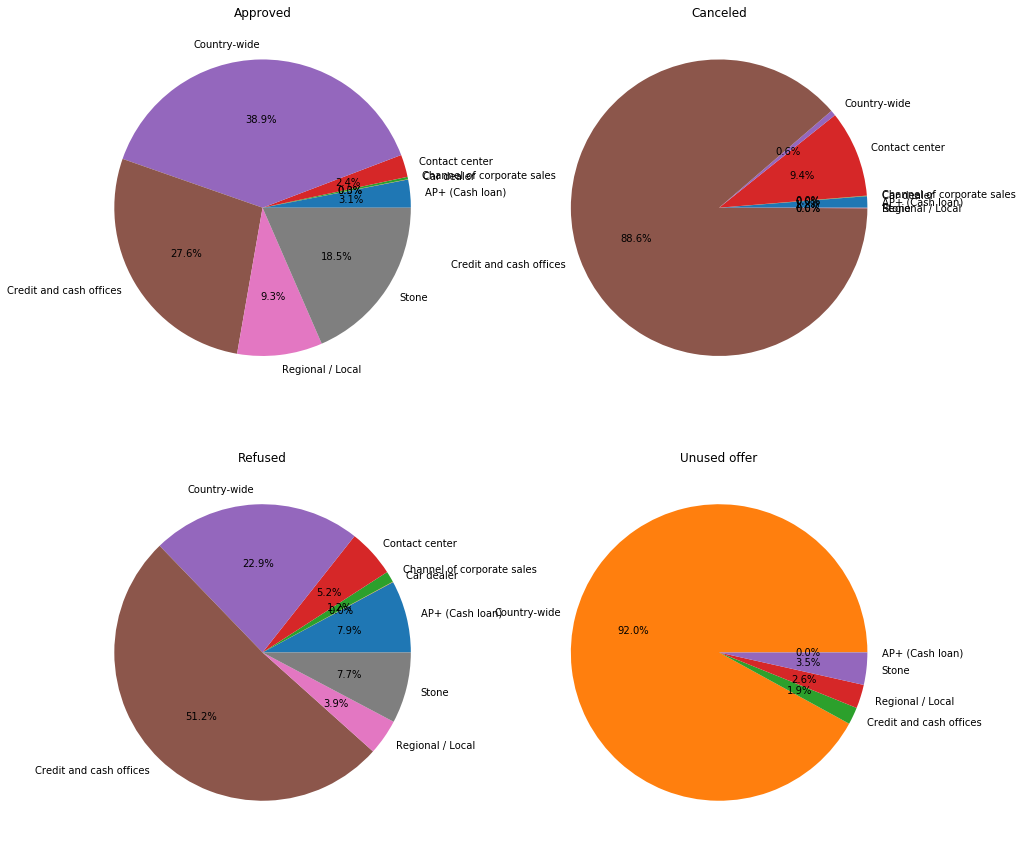

In [113]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plt.title('Approved')
plt.pie(df_A['CHANNEL_TYPE'].value_counts().sort_index(), labels = df_A['CHANNEL_TYPE'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,2)
plt.title('Canceled')
plt.pie(df_C['CHANNEL_TYPE'].value_counts().sort_index(), labels = df_C['CHANNEL_TYPE'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,3)
plt.title('Refused')
plt.pie(df_R['CHANNEL_TYPE'].value_counts().sort_index(), labels = df_R['CHANNEL_TYPE'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,4)
plt.title('Unused offer')
plt.pie(df_U['CHANNEL_TYPE'].value_counts().sort_index(), labels = df_U['CHANNEL_TYPE'].value_counts().index.sort_values(), autopct='%1.1f%%')
plt.show()

#### Chances of an application getting Refused and Canceled are higher for Credit and Cash offices
#### Chances of an application getting Approved is more for Country-Wide Channer Types

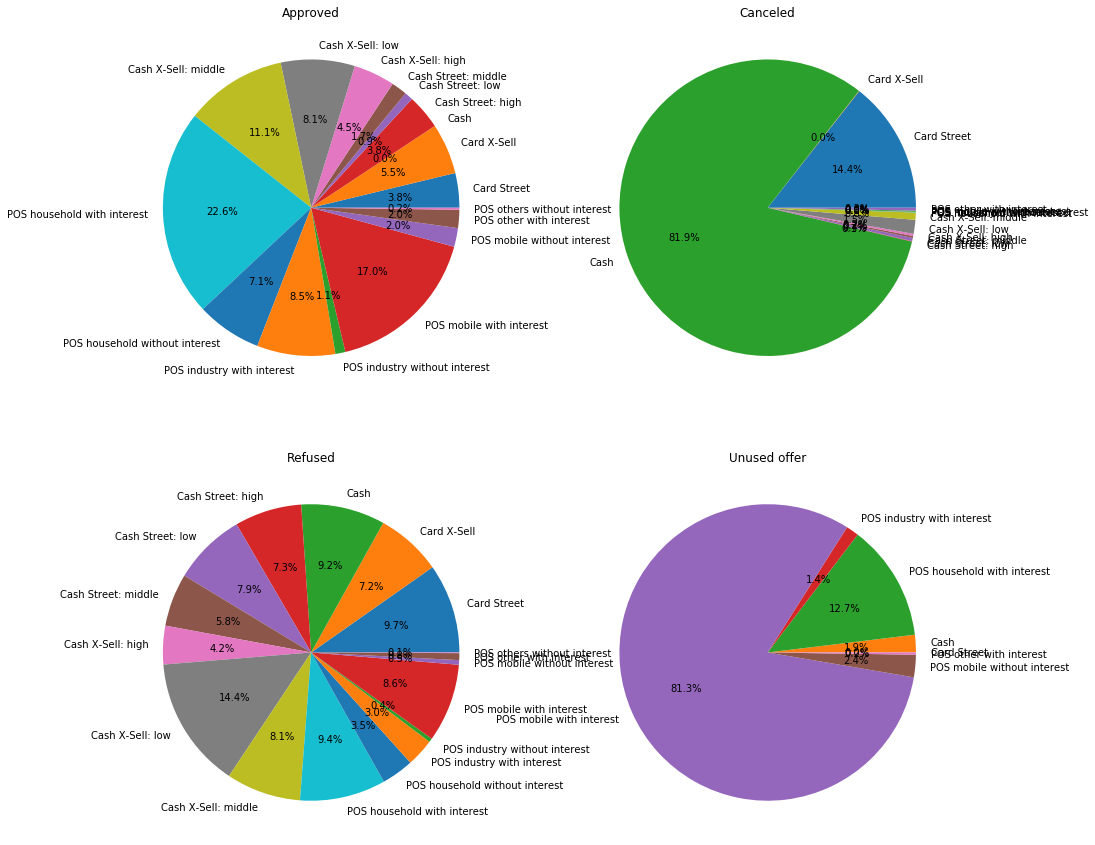

In [115]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plt.title('Approved')
plt.pie(df_A['PRODUCT_COMBINATION'].value_counts().sort_index(), labels = df_A['PRODUCT_COMBINATION'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,2)
plt.title('Canceled')
plt.pie(df_C['PRODUCT_COMBINATION'].value_counts().sort_index(), labels = df_C['PRODUCT_COMBINATION'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,3)
plt.title('Refused')
plt.pie(df_R['PRODUCT_COMBINATION'].value_counts().sort_index(), labels = df_R['PRODUCT_COMBINATION'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,4)
plt.title('Unused offer')
plt.pie(df_U['PRODUCT_COMBINATION'].value_counts().sort_index(), labels = df_U['PRODUCT_COMBINATION'].value_counts().index.sort_values(), autopct='%1.1f%%')
plt.show()

#### Chances of an Application getting approved is more for POS household with Interest and overall POS products
#### Chances of an Application getting Either Cancelled or Refused is more for all Cash products

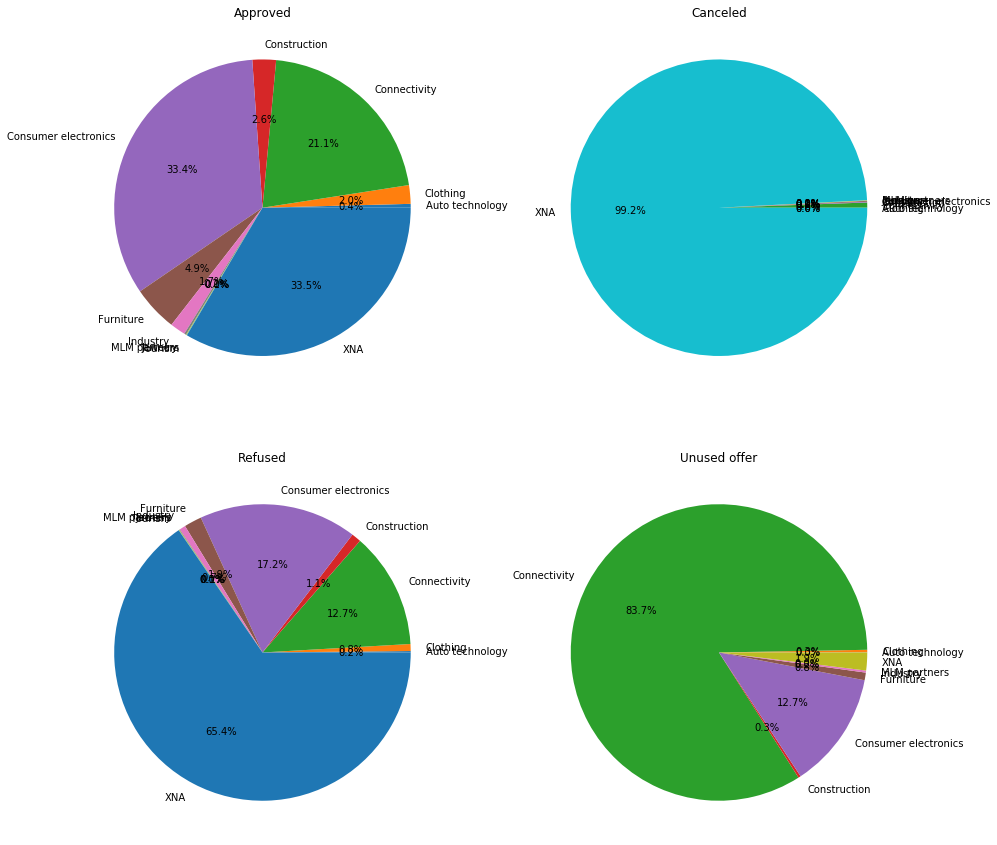

In [116]:
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plt.title('Approved')
plt.pie(df_A['NAME_SELLER_INDUSTRY'].value_counts().sort_index(), labels = df_A['NAME_SELLER_INDUSTRY'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,2)
plt.title('Canceled')
plt.pie(df_C['NAME_SELLER_INDUSTRY'].value_counts().sort_index(), labels = df_C['NAME_SELLER_INDUSTRY'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,3)
plt.title('Refused')
plt.pie(df_R['NAME_SELLER_INDUSTRY'].value_counts().sort_index(), labels = df_R['NAME_SELLER_INDUSTRY'].value_counts().index.sort_values(), autopct='%1.1f%%')


plt.subplot(2,2,4)
plt.title('Unused offer')
plt.pie(df_U['NAME_SELLER_INDUSTRY'].value_counts().sort_index(), labels = df_U['NAME_SELLER_INDUSTRY'].value_counts().index.sort_values(), autopct='%1.1f%%')
plt.show()

#### Chances of Applicant selling consumer Electronics has more chances of getting Approved
#### Chances of an Application getting Refused or Cancelled is more for XNA i,e, if the industry is not known.

## Bi-Variate Analysis

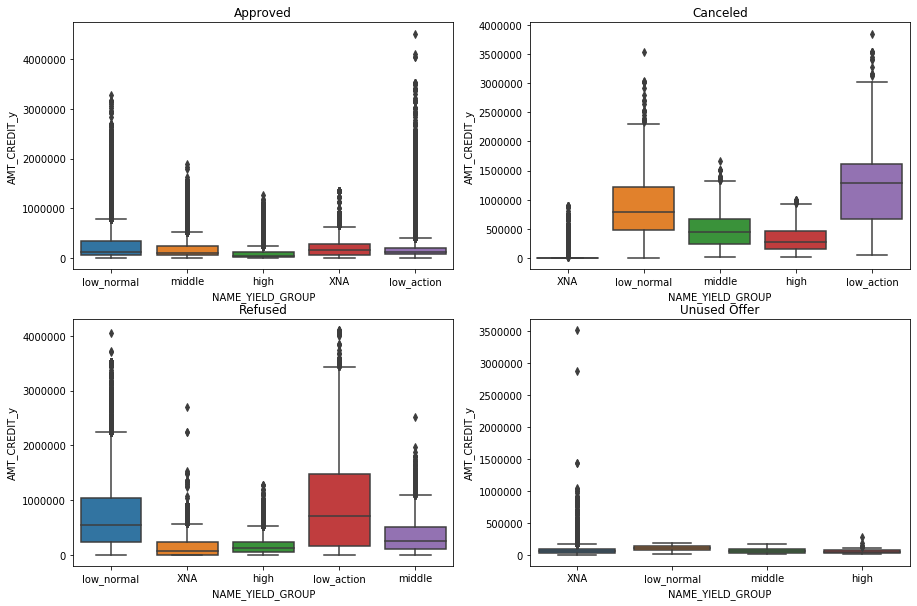

In [120]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "NAME_YIELD_GROUP", y = 'AMT_CREDIT_y', data = df_A)


plt.subplot(2,2,2)
plt.title("Canceled")
sns.boxplot(x = "NAME_YIELD_GROUP", y = 'AMT_CREDIT_y', data = df_C)

plt.subplot(2,2,3)
plt.title("Refused")
sns.boxplot(x = "NAME_YIELD_GROUP", y = 'AMT_CREDIT_y', data = df_R)

plt.subplot(2,2,4)
plt.title("Unused Offer")
sns.boxplot(x = "NAME_YIELD_GROUP", y = 'AMT_CREDIT_y', data = df_U)

plt.show()

#### Chances of Application getting refused or Cancelled is high for Low_action & Low_Normal Yield groups with higher Amt_Credit

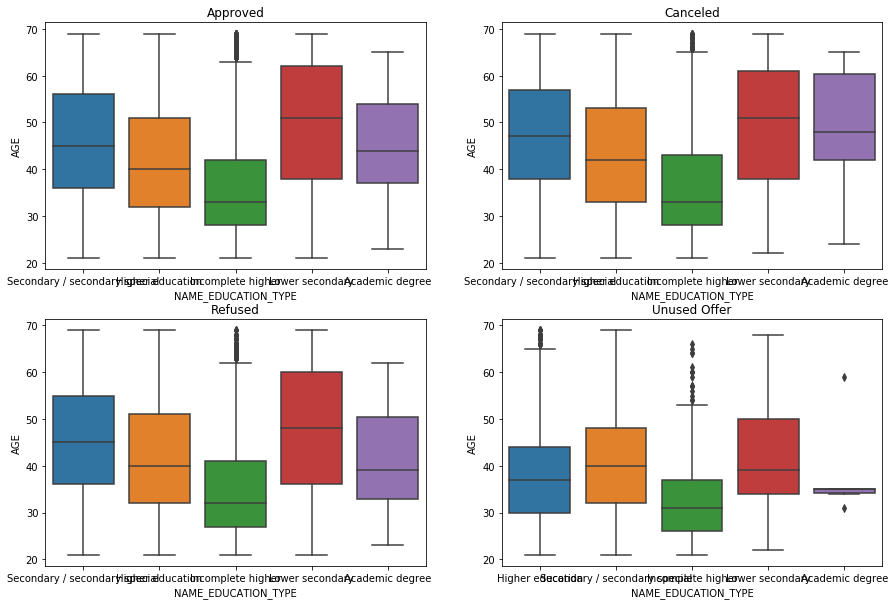

In [127]:
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.title("Approved")
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AGE', data = df_A)


plt.subplot(2,2,2)
plt.title("Canceled")
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AGE', data = df_C)

plt.subplot(2,2,3)
plt.title("Refused")
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AGE', data = df_R)

plt.subplot(2,2,4)
plt.title("Unused Offer")
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = 'AGE',data = df_U)

plt.show()

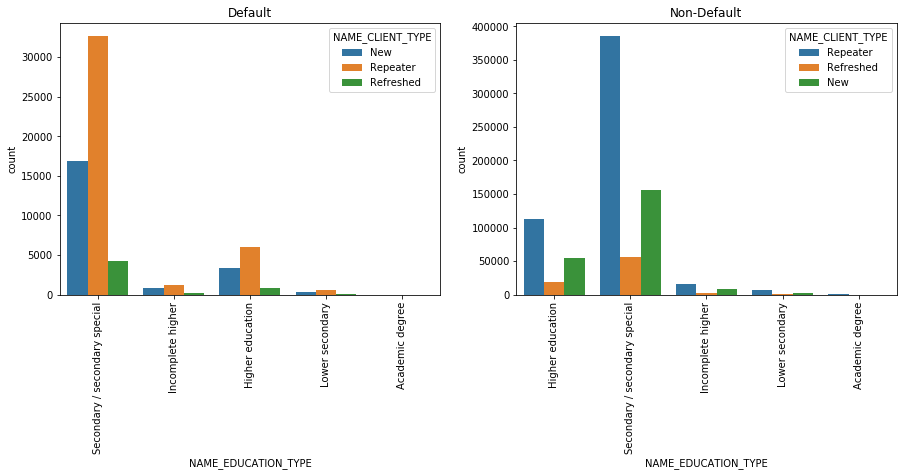

In [134]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.title("Default")
plt.xticks(rotation = 90)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CLIENT_TYPE' , data = df_A[df_A['TARGET']==1])


plt.subplot(1,2,2)
plt.xticks(rotation = 90)
plt.title("Non-Default")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CLIENT_TYPE' ,data =  df_A[df_A['TARGET']==0])

#### Approved Applicants with Education Secondary/ Secondary Special with New & repetitive loans are less likley to Default

#### These are driving factors behind load default:

#### • AMT_CREDIT
#### • NAME_EDUCATION_TYPE
#### • NAME_INCOME_TYPE
#### • NAME_CLIENT_TYPE
#### • PRODUCT_COMBINATION
#### • AGE
#### • DAYS_EMPLOYED
#### • AMT_INCOME_TOTAL
#### • CODE_GENDER